In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset , DataLoader ,random_split
import torch.nn as nn
from torchvision import datasets ,transforms
import os
from PIL import Image

In [2]:
# Set random seeds for reproducibility
torch.manual_seed(42)

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:27<00:00, 41.6MB/s]
100% 1.06G/1.06G [00:27<00:00, 41.7MB/s]


In [4]:
!unzip dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

In [5]:
# device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [6]:
# Data Preprocessing

transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(), # converting the images to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [97]:
# Custom Dataset Class
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.data = []
        self.labels = []

        class_names = sorted(os.listdir(root_dir))
        self.class_to_idx = {class_name: idx for idx, class_name in enumerate(class_names)}

        for class_name in class_names:
            class_dir = os.path.join(root_dir, class_name)
            for img_name in os.listdir(class_dir):
                self.data.append(os.path.join(class_dir, img_name))
                self.labels.append(self.class_to_idx[class_name])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data[idx]
        label = self.labels[idx]
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, label

In [98]:
# Load dataset
dataset_path = "/content/train"
dataset = CustomDataset(root_dir=dataset_path, transform=transform)

In [99]:
# checking the length of the dataset
len(dataset)

20000

In [100]:
# checking the type,shape and label of the images
image , label = dataset[0]
print(type(image))
print(image.shape)
print(label)
print(type(dataset))

<class 'torch.Tensor'>
torch.Size([3, 224, 224])
0
<class '__main__.CustomDataset'>


In [101]:
image

tensor([[[-0.6157, -0.6471, -0.6471,  ..., -0.3882, -0.4039, -0.4118],
         [-0.6314, -0.6314, -0.6314,  ..., -0.3647, -0.3961, -0.4510],
         [-0.6706, -0.6392, -0.6392,  ..., -0.3725, -0.4353, -0.4980],
         ...,
         [-0.5686, -0.5686, -0.5765,  ..., -0.6784, -0.6863, -0.6784],
         [-0.5922, -0.5686, -0.5608,  ..., -0.6863, -0.6941, -0.6784],
         [-0.5843, -0.5608, -0.5608,  ..., -0.6941, -0.6941, -0.6784]],

        [[-0.9451, -0.9529, -0.9451,  ..., -0.5216, -0.5608, -0.6078],
         [-0.9373, -0.9216, -0.9216,  ..., -0.4980, -0.5529, -0.6235],
         [-0.9294, -0.8980, -0.8980,  ..., -0.5137, -0.5765, -0.6471],
         ...,
         [-0.8824, -0.8824, -0.8824,  ..., -0.8980, -0.9137, -0.9137],
         [-0.9059, -0.8824, -0.8667,  ..., -0.9059, -0.9137, -0.9137],
         [-0.8980, -0.8745, -0.8667,  ..., -0.9137, -0.9216, -0.9137]],

        [[-0.9608, -0.9922, -1.0000,  ..., -0.6471, -0.6784, -0.7176],
         [-0.9765, -0.9686, -0.9843,  ..., -0

(-0.5, 223.5, 223.5, -0.5)

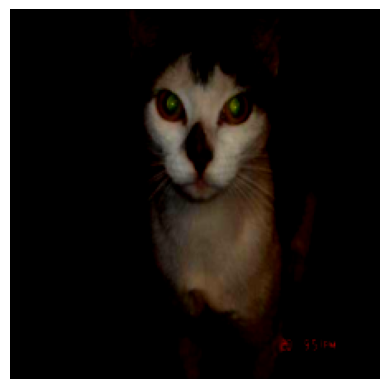

In [102]:
plt.imshow(image.permute(1,2,0))
plt.axis('off')

In [103]:
# performing the train_test_split

# Defining split sizes
train_size = int(0.8 * len(dataset)) # 80%
test_size = len(dataset) - train_size # 20%

# split dataset
train_dataset , test_dataset = random_split(dataset,[train_size,test_size]) # randomly divides the dataset

In [104]:
len(train_dataset) , len(test_dataset )

(16000, 4000)

(-0.5, 223.5, 223.5, -0.5)

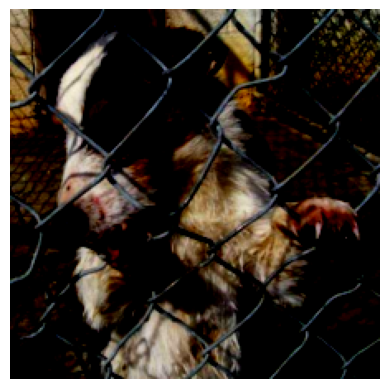

In [105]:
image , label = train_dataset[5]
plt.imshow(image.permute(1,2,0))
plt.axis('off')

(-0.5, 223.5, 223.5, -0.5)

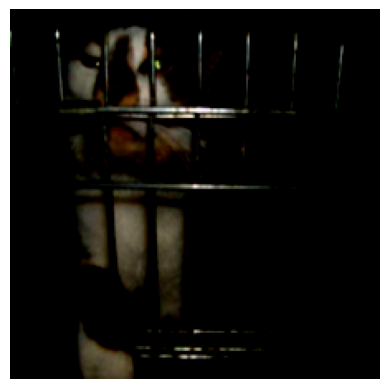

In [106]:
image , label = train_dataset[500]
plt.imshow(image.permute(1,2,0))
plt.axis('off')

In [107]:
# DataLoader

train_loader = DataLoader(train_dataset , batch_size=32 , shuffle=True )
test_loader = DataLoader(test_dataset , batch_size=32 , shuffle=False )

In [108]:
len(train_loader) , len(test_loader)

(500, 125)

In [122]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding='same'),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding='same'),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding='same'),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding='same'),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)


        )
        self.fc_layers = nn.Sequential(
            nn.Linear(256 * 14 * 14, 512),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(128, 2)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        return x

In [123]:
model = CNN().to(device)
model

CNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (13): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): 

In [124]:
model.state_dict()

OrderedDict([('conv_layers.0.weight',
              tensor([[[[ 0.1361,  0.1548, -0.0472],
                        [-0.0210,  0.1361, -0.1724],
                        [-0.1774, -0.1218,  0.1449]],
              
                       [[ 0.1794,  0.0952,  0.0450],
                        [-0.0353,  0.1018,  0.0167],
                        [ 0.1416,  0.1469,  0.0971]],
              
                       [[ 0.0132, -0.1923,  0.0198],
                        [-0.0383, -0.0333, -0.0511],
                        [ 0.1348,  0.0163, -0.0851]]],
              
              
                      [[[-0.0110, -0.0287,  0.1767],
                        [ 0.0956, -0.1557,  0.0368],
                        [-0.1153,  0.0252, -0.0005]],
              
                       [[-0.0870, -0.1697,  0.1110],
                        [ 0.1228, -0.1768, -0.0600],
                        [ 0.1330, -0.0185,  0.0107]],
              
                       [[ 0.0314, -0.0695,  0.1380],
                  

In [126]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

In [127]:
# Training loop
epochs = 5
train_losses, test_losses, train_acc, test_acc = [], [], [], []

for epoch in range(epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_acc.append(correct / total)

    # Validation loop
    model.eval()
    test_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_losses.append(test_loss / len(test_loader))
    test_acc.append(correct / total)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_acc[-1]*100:.2f}%, Test Acc: {test_acc[-1]*100:.2f}%")

Epoch 1/5, Train Loss: 0.9179, Train Acc: 55.37%, Test Acc: 64.22%
Epoch 2/5, Train Loss: 0.6140, Train Acc: 65.89%, Test Acc: 71.58%
Epoch 3/5, Train Loss: 0.5704, Train Acc: 70.91%, Test Acc: 70.23%
Epoch 4/5, Train Loss: 0.5359, Train Acc: 73.66%, Test Acc: 76.05%
Epoch 5/5, Train Loss: 0.4973, Train Acc: 76.50%, Test Acc: 76.60%


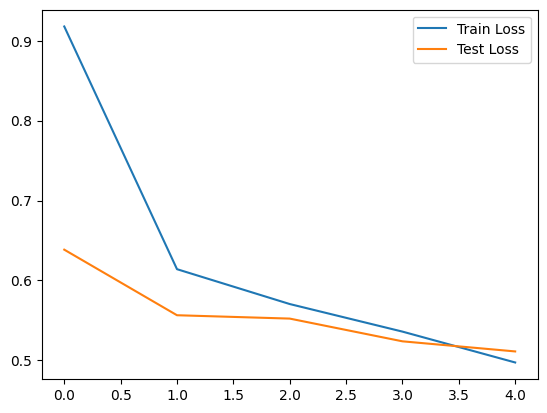

In [129]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()
